In [1]:
from drawwithplt import *

In [2]:
def DrawAllWeight(tmpdata, epoch, layername):
    layer_num = len(tmpdata.keys())
    fig = Dplt.plt.figure(figsize=(2.5*int(layer_num/2),5))
    fig.subplots_adjust(hspace=0.6, wspace=0.8)
    width_ratios = [1] * int(layer_num/2)
    width_ratios.append(0.08)
    gs = Dplt.gridspec.GridSpec(2,
                                int(layer_num/2)+1,
                                width_ratios=width_ratios)
    for index, name in enumerate(tmpdata.keys()):
        ax = Dplt.plt.subplot(gs[index%2,int(index/2)])
        
        data = tmpdata[name].data()
        tmpshape = data.shape
        if len(tmpshape) >= 2:
            data = data.asnumpy().reshape(tmpshape[0], tmpshape[1])
        else:
            data = data.asnumpy().reshape(tmpshape[0], 1)
        im = ax.imshow(data, cmap='seismic', origin='lower', vmin=-1, vmax=1)
        if data.shape[1] < 3:
            ax.set_xticks(range(0,data.shape[1],1))
            ax.set_xticklabels(range(1,data.shape[1]+1,1))
        elif data.shape[1] <= 4:
            ax.set_xticks([int(i) for i in np.linspace(0,data.shape[1]-1,2)])
            ax.set_xticklabels([int(i) for i in np.linspace(1,data.shape[1],2)])
        else:
            ax.set_xticks([int(i) for i in np.linspace(0,data.shape[1]-1,4)])
            ax.set_xticklabels([int(i) for i in np.linspace(1,data.shape[1],4)])

        if data.shape[0] < 3:
            ax.set_yticks(range(0,data.shape[0],1))
            ax.set_yticklabels(range(1,data.shape[0]+1,1))
        elif data.shape[0] <= 4:
            ax.set_yticks([int(i) for i in np.linspace(0,data.shape[0]-1,2)])
            ax.set_yticklabels([int(i) for i in np.linspace(1,data.shape[0],2)])
        else:
            ax.set_yticks([int(i) for i in np.linspace(0,data.shape[0]-1,4)])
            ax.set_yticklabels([int(i) for i in np.linspace(1,data.shape[0],4)])
        ax.set_xlabel('$X^{(n-1)}$')
        ax.set_ylabel('$X^{(n)}$')
        ax.set_title("%s"%(name))
        ax.grid("")
    
    fig.align_ylabels()
    ax = Dplt.plt.subplot(gs[:,-1])
    cbar = fig.colorbar(im, cax=ax)
    cbar.set_label("Weight or Bias (Epoch:%d)"%epoch)
    Dplt.SaveFig(1,"Epoch%d.png"%epoch,
                 "./figure/Net/WeightAndBias/%s/"%(layername))
    Dplt.plt.close()

In [10]:
def Initprop_forDrawMaps(prop, data):
    # 图片尺寸参数
    prop.setdefault("xl", 2.5)
    prop.setdefault("yl", 1.5)
    prop.setdefault("aspect", "auto")

    # 图片横纵间隔
    prop.setdefault("space", (0.5, 0.5))
    prop.setdefault("cbar_weight", 0.08)

    # 绘图参数-cbar
    prop.setdefault("c_labels", 'Cbar')
    prop.setdefault("cbar_str", 'seismic')
    prop.setdefault("vmin", np.min(data[(0,0)]))
    prop.setdefault("vmax", np.max(data[(0,0)]))
    prop.setdefault("vs", 6)
    prop.setdefault("v_fmt", "%.2f")

    # 刻度参数
    prop.setdefault("x0_ticks", [])
    prop.setdefault("x0_tlabels", [])
    prop.setdefault("x0_labels", "x-%d")

    prop.setdefault("x_ticks", [])
    prop.setdefault("x_tlabels", [])
    prop.setdefault("x_labels", "")
    prop.setdefault("x_fmt", "%.2f")

    prop.setdefault("y0_ticks", [])
    prop.setdefault("y0_tlabels", [])
    prop.setdefault("y0_labels", "y-%d")
    
    prop.setdefault("y_ticks", [])
    prop.setdefault("y_tlabels", [])
    prop.setdefault("y_labels", "")
    prop.setdefault("y_fmt", "%.2f")

    return prop



def DrawMaps(xlist, ylist, data, prop = {}):
    x = len(xlist)
    y = len(ylist)
    prop = Initprop_forDrawMaps(prop, data)

    fig = plt.figure(figsize=(prop["yl"]*y, prop["xl"]*x))
    fig.subplots_adjust(hspace=prop["space"][0], wspace=prop["space"][1])
    width_ratios = [1] * y
    width_ratios.append(prop["cbar_weight"])
    gs = gridspec.GridSpec(x, y+1, width_ratios=width_ratios)
    for xi, xv in enumerate(xlist):
        for yi, yv in enumerate(ylist):
            ax = plt.subplot(gs[xi,yi])
            tmpdata = data[(xi,yi)]

            im = ax.imshow(tmpdata, cmap=prop["cbar_str"], origin='lower', vmin=prop["vmin"], vmax=prop["vmax"], aspect=prop["aspect"])

            if xi == x-1:
                ax.set_xticks(prop["x0_ticks"])
                ax.set_xticklabels([prop["x_fmt"]%i for i in prop["x0_tlabels"]])
                if "%" in prop["x0_labels"]:
                    ax.set_xlabel(prop["x0_labels"]%yv)
                else:
                    ax.set_ylabel(prop["x0_labels"])
            else:
                ax.set_xticks(prop["x_ticks"])
                ax.set_xticklabels([prop["x_fmt"]%i for i in prop["x_tlabels"]])
                if "%" in prop["x_labels"]:
                    ax.set_xlabel(prop["x_labels"]%yv)
                else:
                    ax.set_ylabel(prop["x_labels"])

            if yi == 0:
                ax.set_yticks(prop["y0_ticks"])
                ax.set_yticklabels([prop["y_fmt"]%i for i in prop["y0_tlabels"]])
                if "%" in prop["y0_labels"]:
                    ax.set_ylabel(prop["y0_labels"]%xv)
                else:
                    ax.set_ylabel(prop["y0_labels"])
            else:
                ax.set_yticks(prop["y_ticks"])
                ax.set_yticklabels([prop["y_fmt"]%i for i in prop["y_tlabels"]])
                if "%" in prop["y_labels"]:
                    ax.set_ylabel(prop["y_labels"]%xv)
                else:
                    ax.set_ylabel(prop["y_labels"])

    fig.align_ylabels()
    ax = plt.subplot(gs[:,-1])
    cbar = fig.colorbar(im, cax=ax)
    cbar.set_ticks(np.linspace(prop["vmin"], prop["vmax"], prop["vs"]))
    cbar.set_ticklabels([prop["v_fmt"]%i for i in np.linspace(prop["vmin"], prop["vmax"], prop["vs"])])
    cbar.set_label(prop["c_labels"])


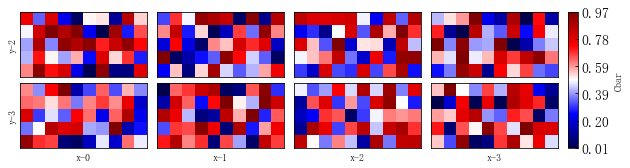

In [11]:
xl = list(range(2,4))
yl = list(range(4))
data = {}
for i,vi in enumerate(xl):
    for j,vj in enumerate(yl):
        data[(i,j)] = np.random.random((5,10))

DrawMaps(xl,yl,data,{"xl":1.25,"yl":2.5,"space":(0.1,0.1)})    